In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sys
sys.path.append(r'\Users\Mochi\AppData\Local\Programs\Python\Python310\Lib\site-packages')
import quads
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib.patches as patches

In [3]:
def find_center(points):
    """
    compute center of given points
    """
    return np.sum(points, axis=0)/points.shape[0]
def max_distance(points):
    """
    compute maximum distance between a set of points
    """
    return max(points)-min(points)

###quad WSPD###
def Compute_Diam(node):
    if len(node.all_points()) > 1:
        return node.width
    else:
        return 0   
## referenced at https://stackoverflow.com/questions/12472338/flattening-a-list-recursively
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])
def WSPD(node_u, node_v, epsilon):
    """
    tree : QuadTree type
    
    Returns:
    WSDP_Pair : list of WSDP pairs
    """
    pairs = []
    diam_u = Compute_Diam(node_u)
    diam_v = Compute_Diam(node_v)
    if node_u == node_v and diam_u <=1:
        return []
    if diam_u < diam_v:
        node_u, node_v = node_v, node_u
        diam_u, diam_v = diam_v, diam_u
    if diam_u <= epsilon * Node_Distance(node_u, node_v):
        return (node_u, node_v)
    
    if node_u.ul is not None and len(node_u.ul.all_points()) > 0:
        pairs.append(WSPD(node_u.ul, node_v, epsilon))
    if node_u.ur is not None and len(node_u.ur.all_points()) > 0:
        pairs.append(WSPD(node_u.ur, node_v, epsilon))
    if node_u.ll is not None and len(node_u.ll.all_points()) > 0:
        pairs.append(WSPD(node_u.ll, node_v, epsilon))
    if node_u.lr is not None and len(node_u.lr.all_points()) > 0:
        pairs.append(WSPD(node_u.lr, node_v, epsilon))
        
    pairs =  flatten(pairs)
    pairs = list(set(pairs))
    return pairs
def Node_Distance(node_u, node_v):
    points_u = node_u.all_points()
    points_v = node_v.all_points()
    min_D = sys.float_info.max
    for p_u in points_u:
        for p_v in points_v:
            a = np.array([p_u.x, p_u.y])
            b = np.array([p_v.x, p_v.y])
            if np.linalg.norm(a-b) < min_D:
                min_D = np.linalg.norm(a-b)
    return min_D

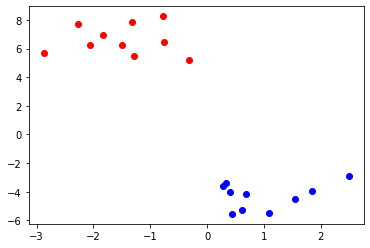

In [5]:
##create 2 clusters
X, y = make_blobs(n_samples=20, centers=2, n_features=2,random_state=100)
u = []
v = []
for i in range(len(y)):
    if y[i] == 0:
        u.append(X[i])
        plt.scatter(X[i,0], X[i,1], c='blue');
    else:
        v.append(X[i])
        plt.scatter(X[i,0], X[i,1], c='red');
plt.show();
u = np.array(u)
v = np.array(v)

In [6]:
epsilon = 8
upper_rad = math.ceil(math.log((1/epsilon), 10) + 1)
lower_rad = -2

In [7]:
center_u = find_center(u)

In [8]:
center_u

array([ 0.97227783, -4.28687627])

In [15]:
def find_midpoint(points):
    """
    compute maximum distance between a set of points
    """
    return (max(points)+min(points))/2

In [18]:
X_u = find_midpoint(u[:,0])
Y_u = find_midpoint(u[:,1])
length = math.ceil(max(np.array([X_u, Y_u])))
print(X_u, Y_u)
print(length)

1.3857921409956062 -4.220968833995092
2


In [25]:
tree = quads.QuadTree(
    (X_u, Y_u),  # The center point
    5,  # The width
    5,  # The height
 )
for i in range(u.shape[0]):
    tree.insert(quads.Point(u[i,0], u[i,1]))

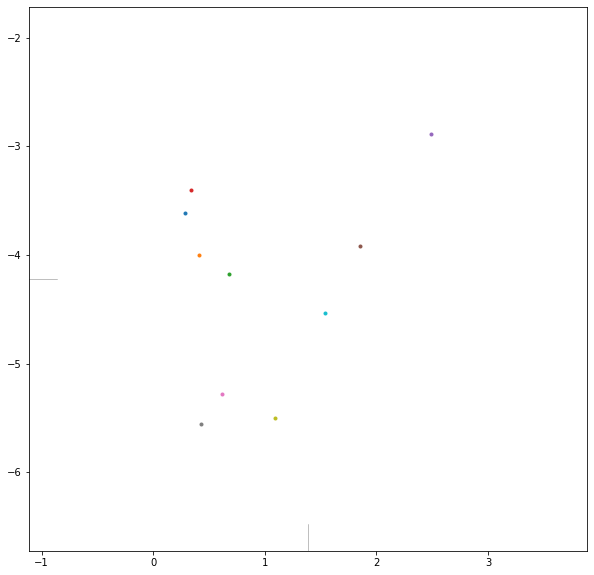

In [26]:
quads.visualize(tree)

In [ ]:
#draw circles and bounding boxes for all NEW WSPDs

fig, ax1 = plt.subplots(1, 1)
pts = tree._root.all_points()
points_u = []

for i in range(len(pts)):
    points_u.append(np.array([pts[i].x, pts[i].y]))
    nd, searched_nodes_u =  tree._root.find_node(u[i])
    ax1.scatter(u[i].x, u[i].y, c='blue');
    # for n in searched_nodes_u:       
    #     rect = patches.Rectangle(((n.center.x-n.width/2), (n.center.y-n.height/2)), n.width, n.height, linewidth=0.5, edgecolor='purple', facecolor='none')
    #     ax1.add_patch(rect)

l = np.linalg.norm(center_u- center_v)
searched_nodes_u = searched_nodes_u[::-1]
searched_nodes_v = searched_nodes_v[::-1]
for m in range(-2,e+1):
    ##replace 15 with length of quadtree bounding box
    if pow(2, m)*l*2 < 15:
        circle1 = plt.Circle( (center_u[0], center_u[1] ), pow(2, m)*l, fill = False );
        ax1.add_patch(circle1)
        circle1 = plt.Circle( (center_v[0], center_v[1] ), pow(2, m)*l, fill = False );
        ax1.add_patch(circle1)
        for rec in searched_nodes_u:
            if checkOverlap(pow(2, m)*l, center_u[0], center_u[1], rec.center.x-rec.width/2, rec.center.y-rec.height/2, rec.center.x+rec.width/2, rec.center.y+rec.height/2) and pow(2, m)*l*8/(16*2):
                rect = patches.Rectangle(((rec.center.x-rec.width/2), (rec.center.y-rec.height/2)), rec.width, rec.height, linewidth=0.5, edgecolor='green', facecolor='none')
                ax1.add_patch(rect)
            else:
                rect = patches.Rectangle(((rec.center.x-rec.width/2), (rec.center.y-rec.height/2)), rec.width, rec.height, linewidth=0.5, edgecolor='purple', facecolor='none')
                ax1.add_patch(rect)
        for rec in searched_nodes_v:
            if checkOverlap(pow(2, m)*l, center_v[0], center_v[1], rec.center.x-rec.width/2, rec.center.y-rec.height/2, rec.center.x+rec.width/2, rec.center.y+rec.height/2) and pow(2, m)*l*8/(16*2):
                rect = patches.Rectangle(((rec.center.x-rec.width/2), (rec.center.y-rec.height/2)), rec.width, rec.height, linewidth=0.5, edgecolor='green', facecolor='none')
                ax1.add_patch(rect)
            else:
                rect = patches.Rectangle(((rec.center.x-rec.width/2), (rec.center.y-rec.height/2)), rec.width, rec.height, linewidth=0.5, edgecolor='purple', facecolor='none')
                ax1.add_patch(rect)
plt.show()